In [1]:
# %load cal_myEnergyBudget.py
from xmitgcm import open_mdsdataset
import xgcm
import os
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib import cm
import pandas as pd
import numpy as np
import math
from scipy import integrate
import xarray as xr
import string

import os, psutil
process = psutil.Process(os.getpid())
print(process.memory_info().rss) 

140161024


In [2]:
currentDirectory = os.getcwd()
data_dir = currentDirectory[:-7] + '/input/'
print(data_dir)

/scratch/jxchang/HighRes1/results/TideU008N0LinH200ho140Ah0200Cdqdt003/input/


In [3]:
ds1 = open_mdsdataset(data_dir, geometry='cartesian', endian='<',prefix=['energyvars','statevars','statevars2d'])
ds2 = open_mdsdataset(data_dir, geometry='cartesian', endian='<',prefix=['energymvars'])
t = 0
grid = xgcm.Grid(ds1, periodic=False)
print(grid)

<xgcm.Grid>
T Axis (not periodic, boundary=None):
  * center   time
X Axis (not periodic, boundary=None):
  * center   XC --> left
  * left     XG --> center
Z Axis (not periodic, boundary=None):
  * center   Z --> left
  * left     Zl --> center
  * outer    Zp1 --> center
  * right    Zu --> center
Y Axis (not periodic, boundary=None):
  * center   YC --> left
  * left     YG --> center


In [4]:
f0 = 1.e-4
g = 9.8
rhoNil=999.8
rhoConst=rhoNil

om=2*np.pi/12.4/3600
alpha = 2e-4
beta = 0e-4
nz = 200
#dz=H/nz 

tR_fname="../indata/TRef.bin"
tRef = np.fromfile(tR_fname)
refSalt=35.
refTemp=tRef[0]
print('refTemp='+ str(refTemp))
print('tRef='+ str(tRef))

rho2=rhoNil*(1-(alpha*(tRef-refTemp)))
rhoS=np.roll(rho2,1)
N2=g/rhoNil*(rho2-rhoS)/ds1['drF'].values
#print('N2='+str(N2))

N2[0]=g/rhoNil*(rhoS[0]-rho2[0])/ds1['drF'][0]
#print(N2)

refTemp=63.59230581861823
tRef=[63.59230582 40.69584406 33.47293155 31.54712706 29.26896757 28.65696899
 28.23721628 27.65390158 27.08300659 26.5118492  25.90295299 25.69407634
 25.29910279 24.81832859 24.41499174 24.26210069 24.21619203 24.14261024
 24.0996551  24.02495734 23.98958682 23.95165181 23.93411373 23.9224752
 23.91844136 23.91059116 23.87093593 23.86487752 23.86221099 23.85790713
 23.84947122 23.84359894 23.82719386 23.81078878 23.79438371 23.77797863
 23.76157355 23.74516847 23.72876339 23.71235831]


In [5]:
xmin = 34000
xmax = 50000
numcolt=21
numcolv=21
                                        
ttlen=len(ds1.time)
print('the length of time:' + str(ttlen) )

time1=ds1.coords['time']
time2=ds2.coords['time']
xc=ds1.coords['XC']
xg=ds1.coords['XG']
yc=ds1.coords['YC']
yg=ds1.coords['YG']
z=ds1.coords['Z']

the length of time:173


In [6]:
# calculate each face of pressure, velocity
PS = 0.5*(ds1['PHIHYD'].roll(YC=1).values+ds1['PHIHYD'].values) 
PW = 0.5*(ds1['PHIHYD'].roll(XC=1).values+ds1['PHIHYD'].values)

#print(np.shape(PS))
#print('PHIHYD=' + str(ds1['PHIHYD'].isel(YC=0,time=100,Z=2).values))
#print('PS='+ str(PS[100,2,0,:]))
print('PW='+ str(PW[100,:,0,1]))
#print(ds1['PHIHYD'].roll(XC=1)+ds1['PHIHYD'])
#print(ds1['PHIHYD'].roll(XC=1).values[100,2,0,:])
#print(ds1['PHIHYD'].values[100,2,0,:])

#when use interp-> can't with .values???  can't work
#US=xr.DataArray(ds1['UVEL'].interp(XG=xc,YC=yg,kwargs={'fill_value':'extrapolate'}).data,coords=[time1,z,yg,xc],dims=['time','Z','YG','XC'])
#print(US.values)
#VW=(ds1['VVEL'].interp(XC=xg,YG=yc, kwargs={'fill_value': 'None'})).values()

# this US.VW.UC.VC only correct in 2d cases
US=0.5*(ds1['UVEL'].roll(XG=-1).values+ds1['UVEL'].values)
VW=0.5*(ds1['VVEL'].roll(XC=1).values+ds1['VVEL'].values) #VW(when X=0, incorrec
UC=US
VC=ds1['VVEL'].values

#print('U:' + str(ds1['UVEL'].isel(YC=0,time=100,Z=2).values))
#print('US:' +str(US[100,2,0,:]))
#print('V:' +str(ds1['VVEL'].isel(YG=0,time=100,Z=2).values))
#print('VW:' + str(VW[100,2,0,:]))

/home/jxchang/jupyter_py3.7/lib/python3.7/site-packages/xarray/core/dataarray.py:3128: FutureWarning: roll_coords will be set to False in the future. Explicitly set roll_coords to silence warning.
  shifts=shifts, roll_coords=roll_coords, **shifts_kwargs


PW=[0.15596013 0.41172682 0.59362574 0.75308743 0.90223891 1.04430227
 1.18383525 1.32090822 1.45515049 1.58659187 1.71513917 1.84168089
 1.96674166 2.08965466 2.21039938 2.32977995 2.44867296 2.56727292
 2.68558708 2.80361269 2.92136836 3.03894425 3.15638409 3.27375237
 3.39108222 3.50838292 3.62556712 3.7426392  3.85968989 3.97672348
 4.09372582 4.21069308 4.32760569 4.44443785 4.56118953 4.67786075
 4.7944515  4.91096179 5.02739161 5.14374096]


In [7]:
# depth mean pressure
P0S=np.sum(PS*(ds1['drF']*ds1['hFacS']).values,axis=1)
P0W=np.sum(PW*(ds1['drF']*ds1['hFacW']).values,axis=1)
P0C=np.sum((ds1['PHIHYD']*ds1['drF']*ds1['hFacC']).values,axis=1)
#print('P0W=' +str(P0W[100,0,:]))
#print(np.shape(P0W))
print(P0S[100,50,721])
print(P0W[100,50,721])
print(P0C[100,50,721])

-0.5494121327512058
-0.08599399966863819
-0.6231909169173049


In [8]:
# depth mean velocity
U0W=((ds1['UVEL']*ds1['drF']*ds1['hFacW']).sum('Z')).values
U0S= np.sum(US*(ds1['drF']*ds1['hFacS']).values,axis=1)
U0C= np.sum(UC*(ds1['drF']*ds1['hFacS']).values,axis=1)
V0W= np.sum(VW*(ds1['drF']*ds1['hFacW']).values,axis=1)
V0S=((ds1['VVEL']*ds1['drF']*ds1['hFacS']).sum('Z')).values
V0C= np.sum(UC*(ds1['drF']*ds1['hFacS']).values,axis=1)
#print(np.shape(U0W))
#print(np.shape(U0S))
print(U0C[100,50,721])

28.22141213435691


In [9]:
print(np.shape(U0W))
print(np.shape(U0S))

(173, 120, 1440)
(173, 120, 1440)


In [10]:
print(U0W[100,50,721])
print(U0S[100,50,721])

27.19583273407303
28.22141213435691


In [11]:
# depth
ZW=((ds1['drF']*ds1['hFacW']).sum('Z')).values
ZS=((ds1['drF']*ds1['hFacS']).sum('Z')).values
ZC=((ds1['drF']*ds1['hFacC']).sum('Z')).values
print(np.shape(ZW))
#print('ZW=' +str(ZW[0,:]))
print(ZC[50,721])
print(ZW[50,721])
print(ZS[50,721])

(120, 1440)
56.17708333333334
56.09375
55.5


In [12]:
# divide depth
for j in range(len(yc)):
    for i in range(len(xc)):
        if ZW[j,i]!=0:
            P0W[:,j,i]=P0W[:,j,i]/ZW[j,i]
        else:
            P0W[:,j,i]=0

    #print(P0W[100,0,:])

    for i in range(len(xc)):
        if ZS[j,i]!=0:
            P0S[:,j,i]=P0S[:,j,i]/ZS[j,i]
        else:
            P0S[:,j,i]=0
            
    for i in range(len(xc)):
        if ZC[j,i]!=0:
            P0C[:,j,i]=P0C[:,j,i]/ZC[j,i]
        else:
            P0C[:,j,i]=0
    #print(P0S[100,0,:])
    #print(U0W[100,0,:])


In [13]:
print(P0C[100,50,721])
print(P0W[100,50,721])
print(P0S[100,50,721])

-0.011093329876517942
-0.001533040662616391
-0.009899317707228933


In [14]:
for j in range(len(yc)):
    for i in range(len(xc)):
        if ZW[j,i]!=0:
            U0W[:,j,i]=U0W[:,j,i]/ZW[j,i]
            V0W[:,j,i]=V0W[:,j,i]/ZW[j,i]
        else:
            U0W[:,j,i]=j
            V0W[:,j,i]=j

    for i in range(len(xc)):
        if ZS[j,i]!=j:
            U0S[:,j,i]=U0S[:,j,i]/ZS[j,i]
            V0S[:,j,i]=V0S[:,j,i]/ZS[j,i]
        else:
            U0S[:,j,i]=j
            V0S[:,j,i]=j

    for i in range(len(xc)):
        if ZC[j,i]!=0:
            U0C[:,j,i]=U0C[:,j,i]/ZC[j,i]
            V0C[:,j,i]=V0C[:,j,i]/ZC[j,i]
        else:
            U0C[:,j,i]=0
            V0C[:,j,i]=0
    #SIZE OF DEPTH MEAN VARIABLE:(TIME,Y,X)
    

/home/jxchang/jupyter_py3.7/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in true_divide
  if sys.path[0] == '':
/home/jxchang/jupyter_py3.7/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in true_divide
  del sys.path[0]


In [15]:
print(U0C[100,50,721])
print(U0W[100,50,721])
print(U0S[100,50,721])

0.5023652076577532
0.484828215872054
0.5084939123307551


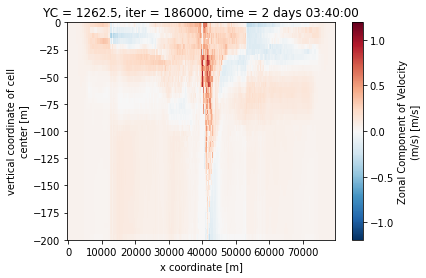

In [16]:
ds1['UVEL'].isel(time=100,YC=50).plot()

In [17]:
ds1['PS']=xr.DataArray(PS,coords=[time1,z,yg,xc],dims=['time','Z','YG','XC'])
ds1['PW']=xr.DataArray(PW,coords=[time1,z,yc,xg],dims=['time','Z','YC','XG'])
ds1['P0S']=xr.DataArray(P0S,coords=[time1,yg,xc],dims=['time','YG','XC'])
ds1['P0W']=xr.DataArray(P0W,coords=[time1,yc,xg],dims=['time','YC','XG'])


In [18]:
ds1['U0S']=xr.DataArray(U0S,coords=[time1,yg,xc],dims=['time','YG','XC'])
ds1['U0W']=xr.DataArray(U0W,coords=[time1,yc,xg],dims=['time','YC','XG'])
ds1['U0C']=xr.DataArray(U0C,coords=[time1,yc,xc],dims=['time','YC','XC'])
ds1['V0S']=xr.DataArray(V0S,coords=[time1,yg,xc],dims=['time','YG','XC'])
ds1['V0W']=xr.DataArray(V0W,coords=[time1,yc,xg],dims=['time','YC','XG'])
ds1['V0C']=xr.DataArray(V0C,coords=[time1,yc,xc],dims=['time','YC','XC'])

ds1['US']=xr.DataArray(US,coords=[time1,z,yg,xc],dims=['time','Z','YG','XC'])
ds1['UC']=xr.DataArray(UC,coords=[time1,z,yc,xc],dims=['time','Z','YC','XC'])
ds1['VW']=xr.DataArray(VW,coords=[time1,z,yc,xg],dims=['time','Z','YC','XG'])
ds1['VC']=xr.DataArray(VC,coords=[time1,z,yc,xc],dims=['time','Z','YC','XC'])

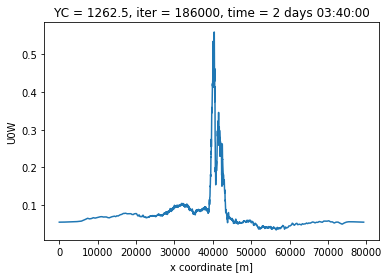

In [19]:
ds1.U0W.isel(time=100,YC=50).plot()

In [20]:
print(ds1['U0W'].isel(time=100,YC=50,XG=721).values)
print(ds1['U0C'].isel(time=100,YC=50,XC=721).values)
print(ds1['U0S'].isel(time=100,YG=50,XC=721).values)

0.484828215872054
0.5023652076577532
0.5084939123307551


In [21]:
ZC=((ds1['drF']*ds1['hFacC']).sum('Z'))
print(ZC.isel(YC=50,XC=721).values)

56.17708333333334


In [22]:
print(ds1['UC'].isel(time=100,YC=50,XC=721).values)
print(ds1['UVEL'].isel(time=100,YC=50,XG=721).values)

[0.28597445 0.1533154  0.30246629 0.01491432 0.43513472 0.51750795
 0.68258116 0.77568097 0.85019086 0.85217674 0.71360493 0.60734648
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.        ]
[0.21536456 0.20103094 0.29822437 0.09043017 0.37032129 0.44957029
 0.66101619 0.63613057 0.82303607 0.89795796 0.70643262 0.40983547
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.        ]


In [23]:
print(ds1['P0W'].isel(time=100,YC=50,XG=721).values)
print(ds1['P0S'].isel(time=100,YG=50,XC=721).values)
print((ds1['PHIHYD']*ds1['drF']*ds1['hFacC']).sum('Z').isel(time=100,YC=50,XC=720).values)
print((ds1['PHIHYD']*ds1['drF']*ds1['hFacC']).sum('Z').isel(time=100,YC=50,XC=721).values)
print((ds1['PHIHYD']*ds1['drF']*ds1['hFacC']).sum('Z').isel(time=100,YC=50,XC=722).values)

-0.001533040662616391
-0.009899317707228933
0.4445046999314895
-0.6231909169173049
-0.9915097310620161


In [24]:
# barotropic kinetic energy
ds1['EkC'] = 0.5*((ds1['U0C']*ds1['U0C']+ds1['V0C']*ds1['V0C'] )*ds1['maskC']) # (5.44) or (5.49)

process = psutil.Process(os.getpid())
print(process.memory_info().rss) 

50475274240


In [25]:
# barotropic potential energy
ds1['Ep0'] = 0.5*ds1.ETAN*ds1.ETAN*g

process = psutil.Process(os.getpid())
print(process.memory_info().rss) 

50475274240


In [26]:
# total barotropic energy
ds1['Ebt']=ds1.EkC+ds1.Ep0

process = psutil.Process(os.getpid())
print(process.memory_info().rss) 

#print(Ep[100,:,0,198].values)
#print(myEbc[100,:,0,198].values)

50475229184


In [27]:
print(ds1.Ebt)

<xarray.DataArray 'Ebt' (time: 173, YC: 120, XC: 1440, Z: 40)>
dask.array<add, shape=(173, 120, 1440, 40), dtype=float64, chunksize=(1, 120, 1440, 40), chunktype=numpy.ndarray>
Coordinates:
  * XC       (XC) float64 356.8 1.06e+03 1.745e+03 ... 7.894e+04 7.964e+04
  * YC       (YC) float64 12.5 37.5 62.5 87.5 ... 2.938e+03 2.962e+03 2.988e+03
  * Z        (Z) float64 -2.5 -7.5 -12.5 -17.5 ... -182.5 -187.5 -192.5 -197.5
    rA       (YC, XC) float64 dask.array<chunksize=(120, 1440), meta=np.ndarray>
    Depth    (YC, XC) float64 dask.array<chunksize=(120, 1440), meta=np.ndarray>
    drF      (Z) float64 dask.array<chunksize=(40,), meta=np.ndarray>
    PHrefC   (Z) float64 dask.array<chunksize=(40,), meta=np.ndarray>
    hFacC    (Z, YC, XC) float64 dask.array<chunksize=(40, 120, 1440), meta=np.ndarray>
    maskC    (Z, YC, XC) bool dask.array<chunksize=(40, 120, 1440), meta=np.ndarray>
    rhoRef   (Z) float64 dask.array<chunksize=(40,), meta=np.ndarray>
    maskInC  (YC, XC) bool dask

50506936320


<Figure size 432x288 with 0 Axes>

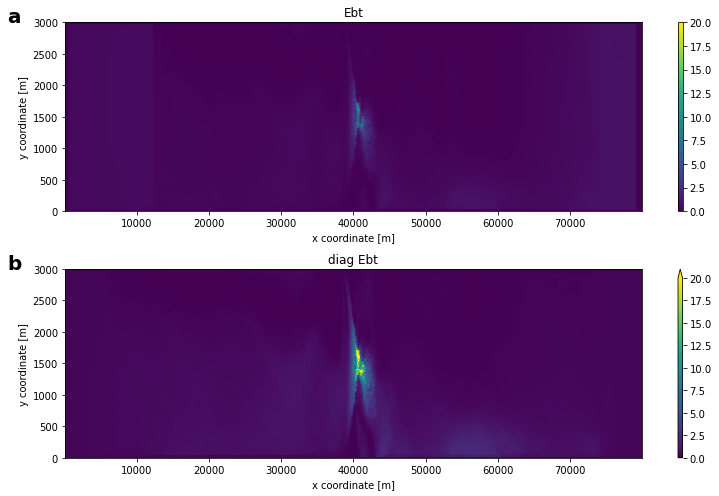

In [28]:
if 1:
    plt.clf()
    f, ax = plt.subplots(2, 1, figsize=(11,7) , sharey=True)
    
    ds1['Ebt'].sum('Z').isel(time=100).plot(ax=ax[0],vmin=0,vmax=20,cbar_kwargs={"label": "", "aspect": 40})
    ax[0].set_title('Ebt')
    ds1['SDIAG1'].isel(time=100).plot(ax=ax[1],vmin=0,vmax=20,cbar_kwargs={"label": "", "aspect": 40})
    ax[1].set_title('diag Ebt')
    
    for n, axs in enumerate(ax):
        axs.text(-0.1, 1, string.ascii_lowercase[n], transform=axs.transAxes,
                size=20, weight='bold')
    plt.tight_layout()
    plt.savefig('./figs/myEbt_t100.png')
    #plt.show()
    
process = psutil.Process(os.getpid())
print(process.memory_info().rss) 

50492096512


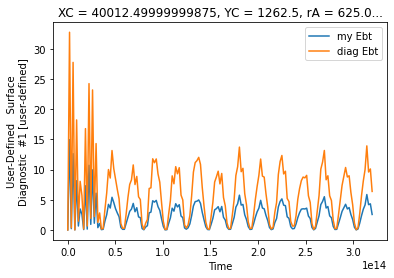

In [29]:
ds1['Ebt'].sum('Z').isel(YC=50,XC=720).plot(label='my Ebt')
ds1['SDIAG1'].isel(YC=50,XC=720).plot(label='diag Ebt')
plt.legend()

    

    
process = psutil.Process(os.getpid())
print(process.memory_info().rss) 

In [30]:
time=ds2.coords['time'].values/np.timedelta64(1, 's')
time_bin_labels = np.arange(12.4*60*60/2,time[-1]-20000,12.4*60*60)
print('time_bin_labels:' +str(time_bin_labels))
time_bin = pd.timedelta_range(0, periods=8,freq='44660S')
print('time_bin:' + str(time_bin))
time_ns = pd.timedelta_range(0, periods=ttlen,freq='1860S')

time_bin_labels:[ 22320.  66960. 111600. 156240. 200880. 245520. 290160.]
time_bin:TimedeltaIndex(['0 days 00:00:00', '0 days 12:24:20', '1 days 00:48:40',
                '1 days 13:13:00', '2 days 01:37:20', '2 days 14:01:40',
                '3 days 02:26:00', '3 days 14:50:20'],
               dtype='timedelta64[ns]', freq='44660S')


In [31]:
dt=time[1]-time[0]
print('dt:' +str(dt))

dt:1860.0


In [32]:
xmin = 13000
xmax = 67000
ymin = 0
ymax = 3000
dtEbt=np.gradient(ds1.Ebt.sum('Z').values*rhoNil,dt,axis=0)
print('dtEbc'+str(dtEbt.shape))
ddtEbt = xr.DataArray(dtEbt.data, coords=[ds1.time.values,yc,xc], dims=['time','YC', 'XC'])
ta_dtEbt = ddtEbt.groupby_bins('time',time_bin,labels=time_bin_labels).mean()
DtdEbt = (ta_dtEbt*ds2['rA']).sel(XC=xc[(xc > xmin) & (xc < xmax)],YC=yc[(yc > ymin) & (yc < ymax)]).sum(['XC','YC'])/1e6

dtEbc(173, 120, 1440)


In [33]:
dia_dtEbt=np.gradient(ds1.SDIAG1.values*rhoNil,dt,axis=0)
print('dtEbc'+str(dia_dtEbt.shape))
dia_ddtEbt = xr.DataArray(dia_dtEbt.data, coords=[ds1.time.values,yc,xc], dims=['time','YC', 'XC'])
dia_ta_dtEbt = dia_ddtEbt.groupby_bins('time',time_bin,labels=time_bin_labels).mean()
dia_DtdEbt = (dia_ta_dtEbt*ds2['rA']).sel(XC=xc[(xc > xmin) & (xc < xmax)],YC=yc[(yc > ymin) & (yc < ymax)]).sum(['XC','YC'])/1e6

dtEbc(173, 120, 1440)


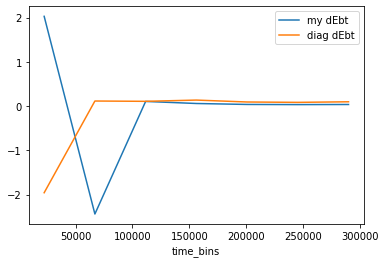

In [34]:
DtdEbt.plot(label='my dEbt')
dia_DtdEbt.plot(label='diag dEbt')
plt.legend()

In [35]:
df = pd.DataFrame({"dEbt/dt": DtdEbt.values,"dia dEbt/dt": dia_DtdEbt.values})
print('df')
print(process.memory_info().rss) 
df.to_csv("TidallyAveragedMydEbtdt.csv")
print('saved csv')
print(process.memory_info().rss) 

df
51197825024
saved csv
51197952000


In [36]:
read_df = pd.read_csv("TidallyAveragedMydEbtdt.csv")

In [37]:
print(read_df)

   Unnamed: 0   dEbt/dt  dia dEbt/dt
0           0  2.029185    -1.959197
1           1 -2.440156     0.114515
2           2  0.105283     0.107604
3           3  0.058654     0.135703
4           4  0.037102     0.092564
5           5  0.033675     0.084139
6           6  0.036065     0.097274
